In [1]:

import uproot	
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
from scipy import stats
from utils.fit_linear_regression_model import fit_linear_regression_model
import sklearn
import seaborn as sns
import pandas as pd
import mplhep
mplhep.style.use(["LHCbTex2"])

plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [2]:
def round(n, k):
    # function to round number 'n' up/down to nearest 'k'
    # use positive k to round up
    # use negative k to round down

    return n - n % k

In [3]:
file = uproot.open(
    "/work/cetin/Projektpraktikum/tracking_losses_ntuple_B_EndVeloP.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[
    (allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromB)
]  # B: 9056
lost = allcolumns[
    (allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromB)
]  # B: 1466

electrons = allcolumns[
    (allcolumns.isElectron)
    & (allcolumns.fromB)
    & (allcolumns.eta <= 5.0)
    & (allcolumns.eta >= 1.5)
    & (np.abs(allcolumns.phi) < 3.142)
]

print(ak.num(found, axis=0), ak.num(lost, axis=0))
print(ak.num(electrons, axis=0))
# ak.count(found, axis=None)

41978 8523
49865


In [4]:
rad_length_found = ak.to_numpy(
    found[(found.eta <= 5.0) & (found.eta >= 1.5) &
          (np.abs(found.phi) < 3.142)]["rad_length_frac"])
eta_found = ak.to_numpy(found[(found.eta <= 5.0) & (found.eta >= 1.5) &
                              (np.abs(found.phi) < 3.142)]["eta"])
phi_found = ak.to_numpy(found[(found.eta <= 5.0) & (found.eta >= 1.5) &
                              (np.abs(found.phi) < 3.142)]["phi"])
rad_length_lost = ak.to_numpy(
    lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) &
         (np.abs(lost.phi) < 3.142)]["rad_length_frac"])
eta_lost = ak.to_numpy(lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) &
                            (np.abs(lost.phi) < 3.142)]["eta"])
phi_lost = ak.to_numpy(lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) &
                            (np.abs(lost.phi) < 3.142)]["phi"])

eta_a = ak.to_numpy(electrons["eta"])
phi_a = ak.to_numpy(electrons["phi"])
rad_length_frac_a = ak.to_numpy(electrons["rad_length_frac"])

stretch_factor = ak.num(eta_lost, axis=0) / ak.num(eta_found, axis=0)
print("stretch factor: ", stretch_factor)

stretch factor:  0.1943140448361755


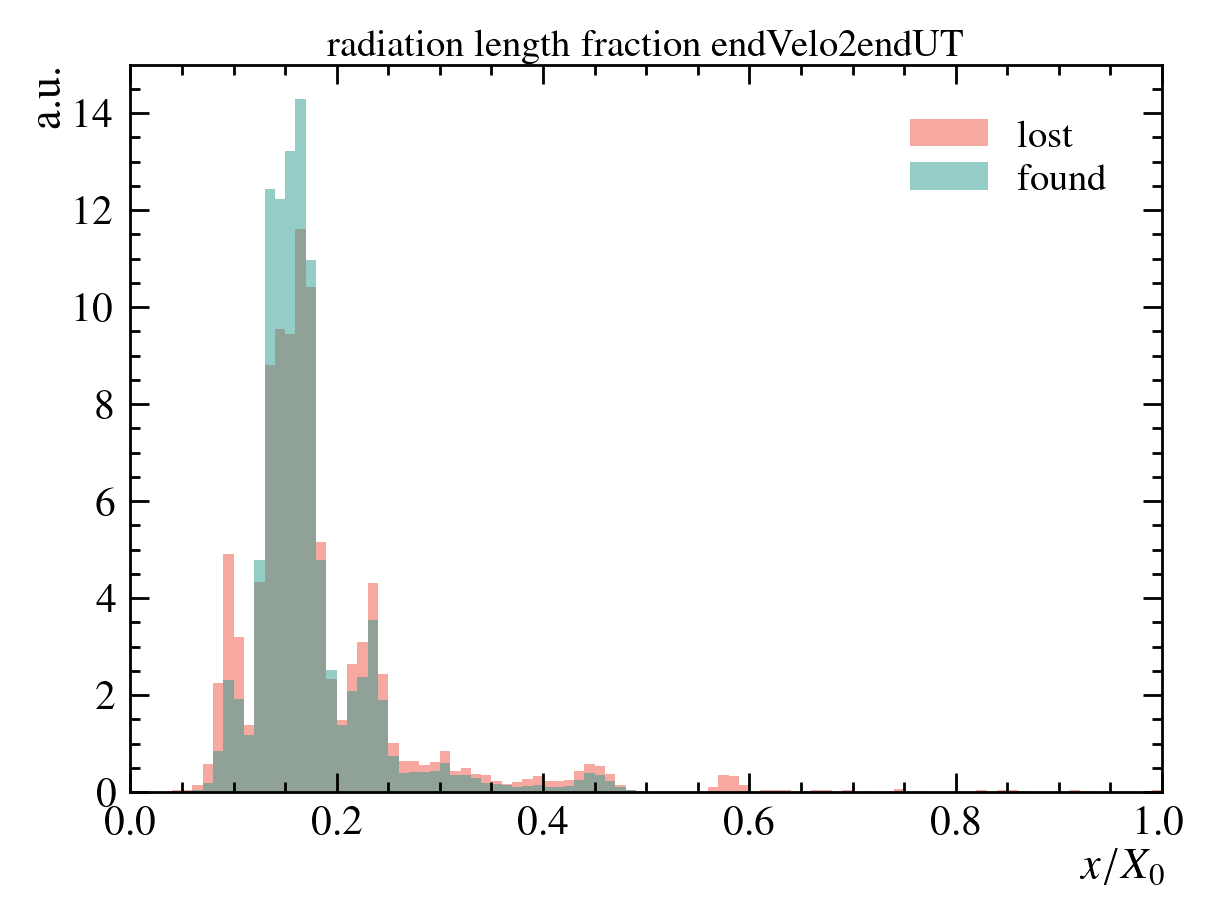

In [5]:
plt.hist(
    rad_length_lost,
    bins=100,
    density=True,
    alpha=0.5,
    color="#F05342",
    histtype="bar",
    label="lost",
    range=[0, 1],
)
plt.hist(
    rad_length_found,
    bins=100,
    density=True,
    alpha=0.5,
    color="#2A9D8F",
    histtype="bar",
    label="found",
    range=[0, 1],
)
plt.xlim(0, 1)
# plt.yscale("log")
plt.title("radiation length fraction endVelo2endUT")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")

plt.legend()
plt.show()

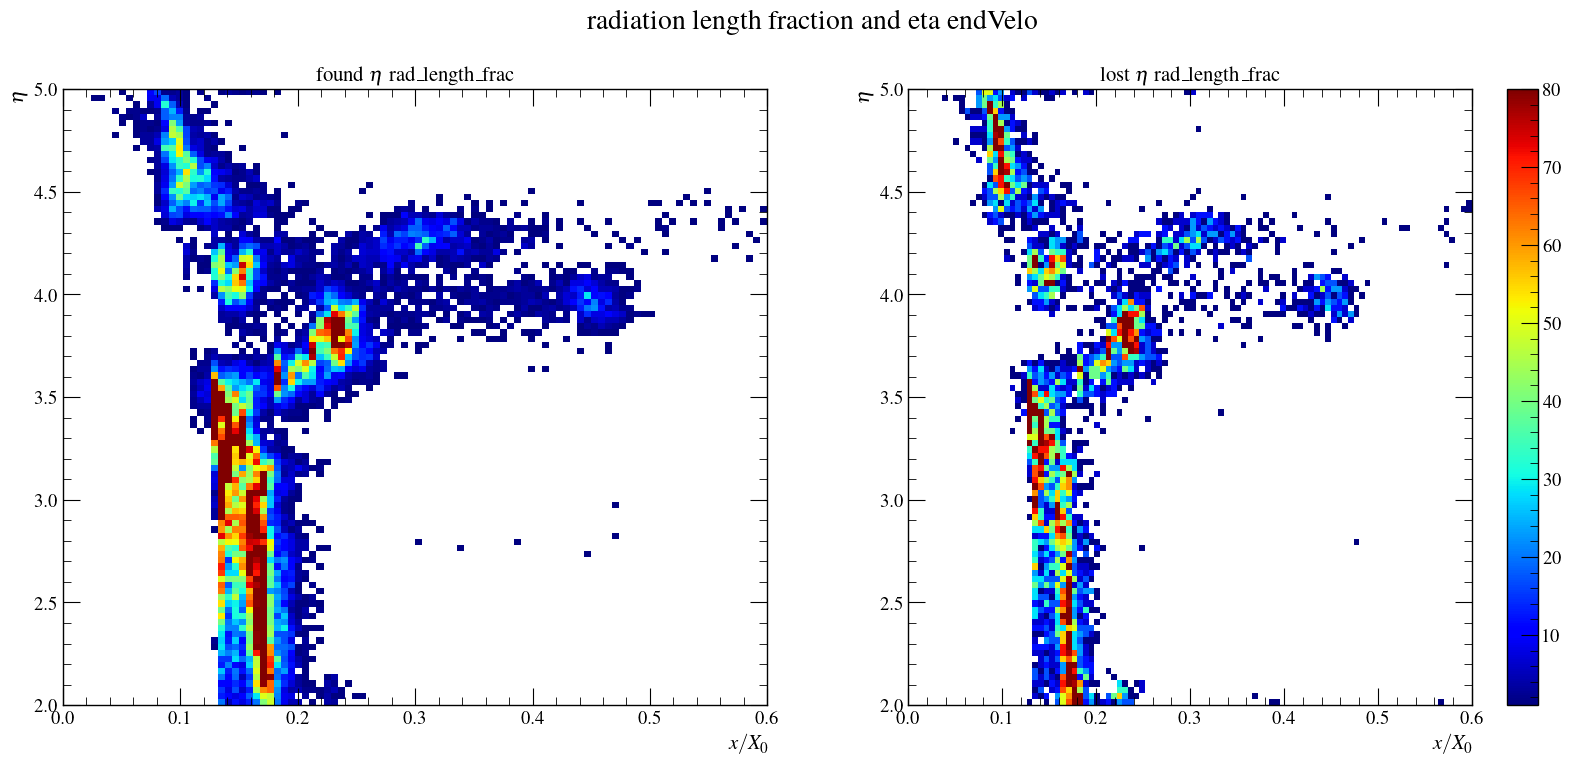

In [10]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

a0 = ax0.hist2d(
    rad_length_found,
    eta_found,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.6], [2, 5]],
)
ax0.set_xlabel(f"$x/X_0$")
ax0.set_ylabel(f"$\eta$")
ax0.set_title(f"found $\eta$ rad_length_frac")

a1 = ax1.hist2d(
    rad_length_lost,
    eta_lost,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[0, 0.6], [2, 5]],
)
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel(f"$\eta$")
ax1.set_title(f"lost $\eta$ rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.suptitle("radiation length fraction and eta endVelo")
plt.colorbar(a0[3], ax=ax1)

plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.19830920321074946, 'x': -4.49175976974402e-05, 'y': 0.00039490060416272056, 'tx': 0.00015102371088508598, 'ty': -0.3004315695136339, 'qop': -15.314945266490128, 'x^2': -1.8619394568578818e-05, 'x y': -4.953907513838906e-06, 'x tx': 0.021617503882699386, 'x ty': 0.03829244150062255, 'x qop': -0.41798007270055415, 'y^2': -2.4410328131494868e-05, 'y tx': -0.03443063985633742, 'y ty': 0.024201355785359608, 'y qop': 0.069823295273139, 'tx^2': -9.507076220830514, 'tx ty': -0.3980701633198789, 'tx qop': -0.04742639222342226, 'ty^2': -5.342167619183405, 'ty qop': 0.04842038611881145, 'qop^2': 0.2070268831284635, 'x^3': 1.5823479402461545e-07, 'x^2 y': -5.806838940825474e-07, 'x^2 tx': -0.00023418353598118923, 'x^2 ty': 0.0037081774556846224, 'x^2 qop': 0.01641641113222204, 'x y^2': 6.398758958085149e-08, 'x y tx': -0.002932641224303519, 'x y ty': -0.001396824762733282, 'x y qop': -0.020888196868450136, 'x tx^2': 0.0909690812412

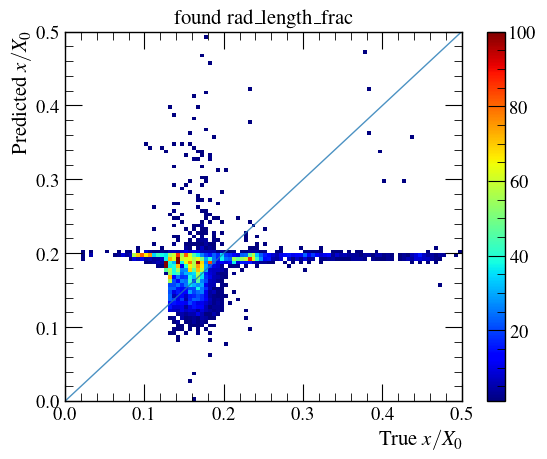

In [11]:
rad_length_frac = found["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = found["ideal_state_770_tx"]
    slopey = found["ideal_state_770_ty"]
    x = found["ideal_state_770_x"]
    y = found["ideal_state_770_y"]
    qop = found["ideal_state_770_qop"]
elif state == 2:
    slopex = found["ideal_state_9410_tx"]
    slopey = found["ideal_state_9410_ty"]
    x = found["ideal_state_9410_x"]
    y = found["ideal_state_9410_y"]
    qop = found["ideal_state_9410_qop"]

data = ak.zip(
    {
        "rad_length_frac": rad_length_frac,
        "x": x,
        "y": y,
        "tx": slopex,
        "ty": slopey,
        "qop": qop,
    }
)
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 100

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
plt.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"found rad_length_frac")

plt.colorbar(a0[3])
plt.show()

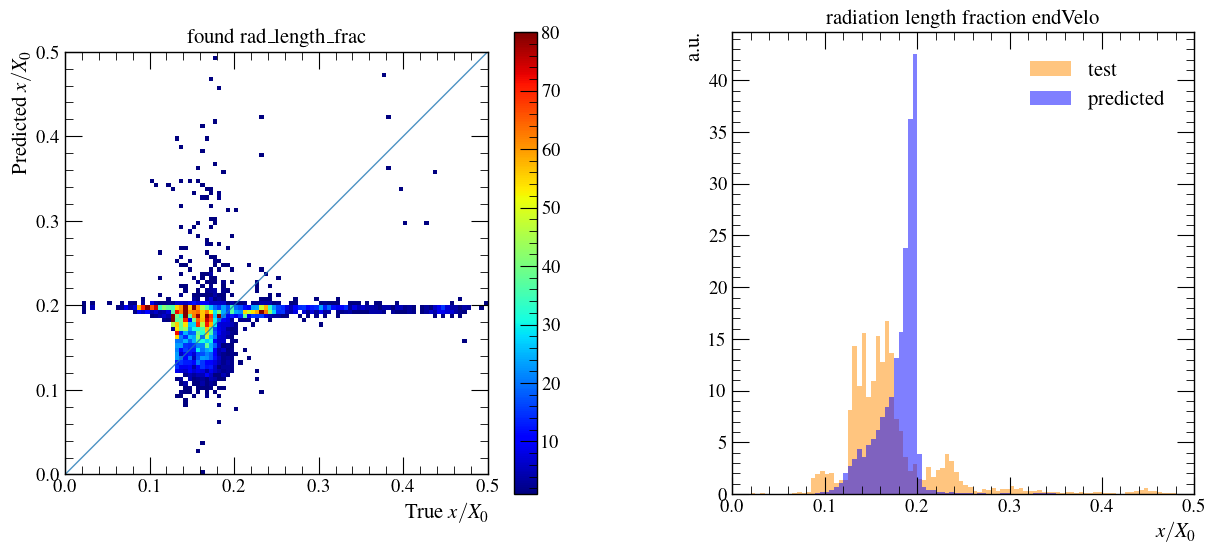

In [12]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ax0.set_aspect("equal")

a0 = ax0.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
ax0.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
ax0.set_box_aspect(1)
ax0.set_xlabel(f"True $x/X_0$")
ax0.set_ylabel(f"Predicted $x/X_0$")
ax0.set_title(f"found rad_length_frac")
plt.colorbar(a0[3], ax=ax0)

ax1.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
ax1.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
ax1.set_xlim(0, 0.5)
ax1.set_title("radiation length fraction endVelo")
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel("a.u.")
ax1.set_box_aspect(1)

ax1.legend()

# plt.gca().set_aspect("equal")
plt.show()

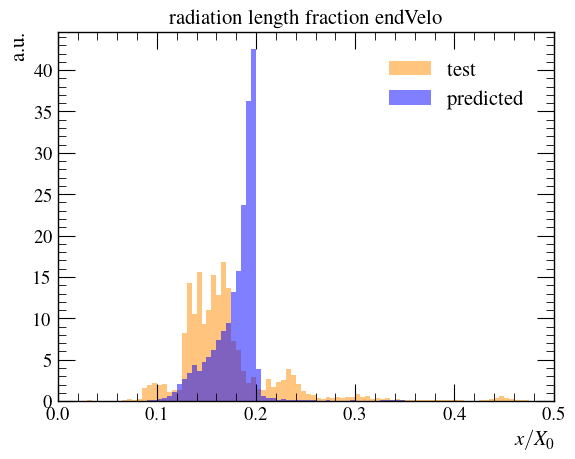

In [13]:
plt.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
plt.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
plt.xlim(0, 0.5)
# plt.yscale("log")
plt.title("radiation length fraction endVelo")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")

plt.legend()
plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.2484410418213911, 'x': -0.0007601095488043627, 'y': 0.0010569724392146917, 'tx': 0.6185505303064777, 'ty': -0.9394058560136732, 'qop': -9.741031889614183, 'x^2': -0.00016580416280366622, 'x y': 5.149038989659081e-05, 'x tx': 0.22996768886351043, 'x ty': -0.043161009059129354, 'x qop': -0.21658279194428842, 'y^2': 3.9826067539320166e-05, 'y tx': -0.033498957247677735, 'y ty': -0.08085122767618998, 'y qop': 0.06428923004582791, 'tx^2': -83.06687438225835, 'tx ty': 28.76266798578089, 'tx qop': -0.32072666519746007, 'ty^2': 32.80290436519906, 'ty qop': 0.29785759094660047, 'qop^2': 0.7177557091128425, 'x^3': -1.037888276319177e-06, 'x^2 y': 5.744977724613286e-07, 'x^2 tx': 0.0016261562680787358, 'x^2 ty': 0.00819223051446815, 'x^2 qop': 0.014940216048602184, 'x y^2': 1.55836456652794e-06, 'x y tx': -0.009042353485603404, 'x y ty': 0.002769481233443616, 'x y qop': 0.007035099510620806, 'x tx^2': -0.623629094925692, 'x tx ty'

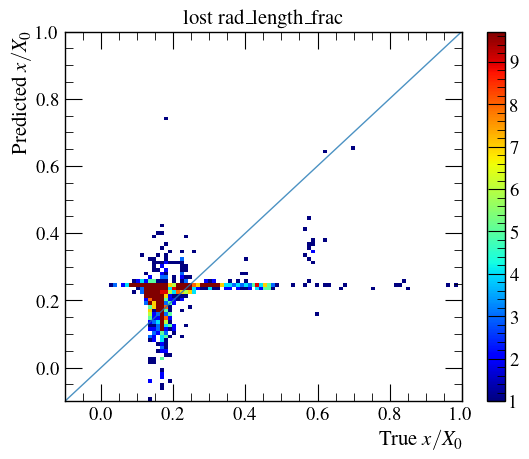

In [14]:
rad_length_frac = lost["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = lost["ideal_state_770_tx"]
    slopey = lost["ideal_state_770_ty"]
    x = lost["ideal_state_770_x"]
    y = lost["ideal_state_770_y"]
    qop = lost["ideal_state_770_qop"]
elif state == 2:
    slopex = lost["ideal_state_9410_tx"]
    slopey = lost["ideal_state_9410_ty"]
    x = lost["ideal_state_9410_x"]
    y = lost["ideal_state_9410_y"]
    qop = lost["ideal_state_9410_qop"]

data = ak.zip({
    "rad_length_frac": rad_length_frac,
    "x": x,
    "y": y,
    "tx": slopex,
    "ty": slopey,
    "qop": qop,
})
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 50

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[-0.1, 1.0], [-0.1, 1.0]],
)
plt.plot([-0.1, 1.0], [-0.1, 1.0], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"lost rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a0[3])
plt.show()

In [15]:
df = pd.DataFrame({
    "phi": phi_a * 90.0 / np.pi,
    "eta": eta_a * 2.0,
    "rad_length_frac": rad_length_frac_a,
})
df = df.round({"phi": 0, "eta": 1, "rad_length_frac": 4})

In [20]:
df_pivoted = df.pivot_table(
    index="eta",
    columns="phi",
    values="rad_length_frac",
    margins=False,
    # fill_value=0,
)

In [21]:
df_pivoted

phi    -90.0    -89.0    -88.0     -87.0    -86.0    -85.0   -84.0    -83.0  \
eta                                                                           
3.1      NaN      NaN      NaN       NaN      NaN      NaN     NaN      NaN   
3.2      NaN      NaN      NaN       NaN      NaN      NaN     NaN      NaN   
3.3      NaN  0.96215      NaN  0.746800      NaN      NaN  1.7263      NaN   
3.4      NaN      NaN      NaN  0.743500  0.37900  0.11090  1.6273      NaN   
3.5      NaN  0.38280  0.33605  0.110300      NaN  1.11870     NaN  0.23330   
...      ...      ...      ...       ...      ...      ...     ...      ...   
9.6      NaN  0.09270  0.09775  0.099525  0.09825      NaN  0.0926  0.09710   
9.7      NaN      NaN      NaN  0.098700  0.09340  0.09075  0.0900  0.08810   
9.8   0.0922  0.09230  0.09660  0.089067  0.09260      NaN  0.0802  0.09195   
9.9      NaN  0.09080  0.08490  0.076200      NaN  0.08550  0.0900  0.09840   
10.0     NaN  0.19140      NaN  0.119100      NaN  0.17850     NaN      NaN   

phi      -82.0   -81.0  ...    81.0     82.0    83.0     84.0    85.0    86.0  \
eta                     ...                                                     
3.1        NaN     NaN  ...     NaN      NaN     NaN      NaN     NaN     NaN   
3.2        NaN     NaN  ...     NaN      NaN     NaN      NaN     NaN     NaN   
3.3   0.381400     NaN  ...  0.3813      NaN     NaN      NaN     NaN     NaN   
3.4   0.380200  0.1115  ...     NaN      NaN     NaN  0.38025  1.1143  0.7429   
3.5   1.479350     NaN  ...  0.1458  0.39860     NaN  0.39800     NaN  0.7175   
...        ...     ...  ...     ...      ...     ...      ...     ...     ...   
9.6        NaN  0.0934  ...     NaN  0.09000  0.1005  0.09510  0.1005     NaN   
9.7        NaN     NaN  ...  0.0912      NaN     NaN  0.09350  0.0962  0.0971   
9.8   0.090867     NaN  ...     NaN  0.07670     NaN  0.08775     NaN     NaN   
9.9   0.090000     NaN  ...  0.3018  0.08900  0.0889      NaN  0.0900     NaN   
10.0       NaN     NaN  ...     NaN  0.10425  0.1109  0.08550     NaN     NaN   

phi     87.0     88.0      89.0   90.0  
eta                                     
3.1      NaN      NaN       NaN    NaN  
3.2      NaN      NaN       NaN    NaN  
3.3      NaN      NaN       NaN    NaN  
3.4   0.1109      NaN  0.378400    NaN  
3.5   0.7303      NaN  0.243900    NaN  
...      ...      ...       ...    ...  
9.6   0.0960  0.09185  0.094067    NaN  
9.7      NaN  0.09540       NaN    NaN  
9.8   0.0920  0.08030  0.100300    NaN  
9.9      NaN  0.08160  0.088767    NaN  
10.0     NaN      NaN  0.081500    NaN  

[70 rows x 181 columns]

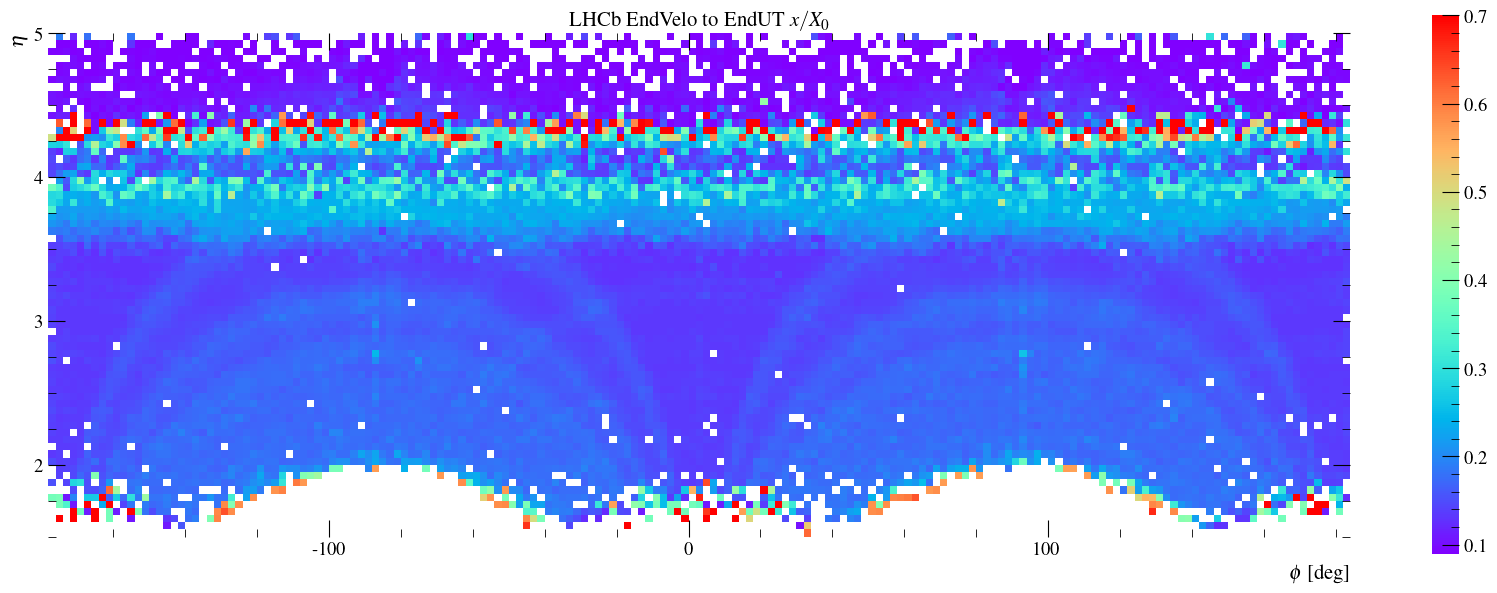

In [22]:
fig = plt.figure(figsize=(21, 7))
ax = sns.heatmap(
    df_pivoted,
    robust=True,
    square=True,
    cmap=colormaps["rainbow"],
    xticklabels=False,
    yticklabels=False,
    vmax=0.7,
)
# ax.set_yticks([5, 15, 25, 35], [2, 3, 4, 5])
ax.set_yticks([10, 30, 50, 70], [2, 3, 4, 5])
ax.set_xticks([39, 89, 139],
              [-100, 0, 100])  # ([79, 179, 279], [-100, 0, 100])
ax.set_xlabel(f"$\phi$ [deg]")
ax.set_ylabel(f"$\eta$")

# ax.set_yticklabels([])
ax.invert_yaxis()
ax.set_title("LHCb EndVelo to EndUT $x/X_0$")
plt.show()

In [19]:
# # make these smaller to increase the resolution
# dy, dx = 0.1, 1.0

# # generate 2 2d grids for the x & y bounds
# y, x = np.mgrid[slice(1.5, 5 + dy, dy), slice(-180, 180 + dx, dx)]

# plt.pcolormesh(x, y, df_pivoted, cmap=colormaps["jet"], vmax=0.7)

# plt.colorbar()
# plt.show()